In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore


In [3]:
# Load dataset
df = pd.read_csv("house_price.csv")

In [4]:
# Q1:
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB

Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+0

In [6]:
# Q2:
price_sqft = df["price_per_sqft"]
# a) Mean and Standard Deviation Method
mean = price_sqft.mean()
std_dev = price_sqft.std()
upper_bound = mean + 3 * std_dev
lower_bound = mean - 3 * std_dev
df_trimmed_std = df[(price_sqft >= lower_bound) & (price_sqft <= upper_bound)]

In [7]:
# b) Percentile Method (5%-95%)
p5, p95 = np.percentile(price_sqft, [5, 95])
df_trimmed_perc = df[(price_sqft >= p5) & (price_sqft <= p95)]

In [8]:
# c) IQR Method
Q1, Q3 = price_sqft.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_IQR = Q1 - 1.5 * IQR
upper_IQR = Q3 + 1.5 * IQR
df_trimmed_iqr = df[(price_sqft >= lower_IQR) & (price_sqft <= upper_IQR)]

In [9]:
# d) Z-Score Method
df["z_score"] = zscore(price_sqft)
df_trimmed_z = df[abs(df["z_score"]) < 3]
df = df.drop(columns=["z_score"])  # Remove temp z-score column


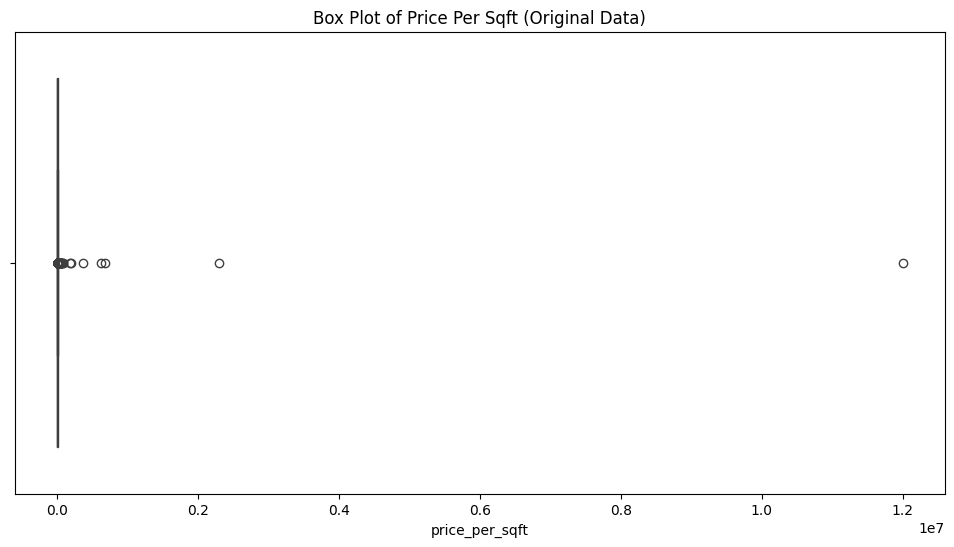

In [10]:
# Q3:
plt.figure(figsize=(12,6))
sns.boxplot(x=price_sqft)
plt.title("Box Plot of Price Per Sqft (Original Data)")
plt.show()

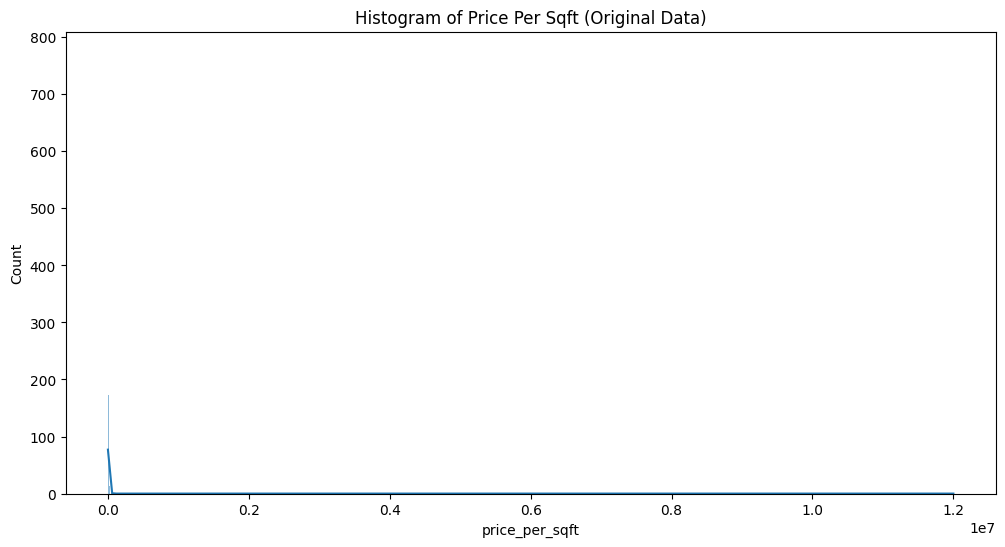

In [11]:
# Q4:
plt.figure(figsize=(12,6))
sns.histplot(price_sqft, kde=True)
plt.title("Histogram of Price Per Sqft (Original Data)")
plt.show()

In [13]:
# Checking skewness and kurtosis
print("Original Skewness:", skew(price_sqft))
print("Original Kurtosis:", kurtosis(price_sqft))


Original Skewness: 108.26875024325159
Original Kurtosis: 12090.633538860382


In [15]:
df["log_price_per_sqft"] = np.log1p(price_sqft)

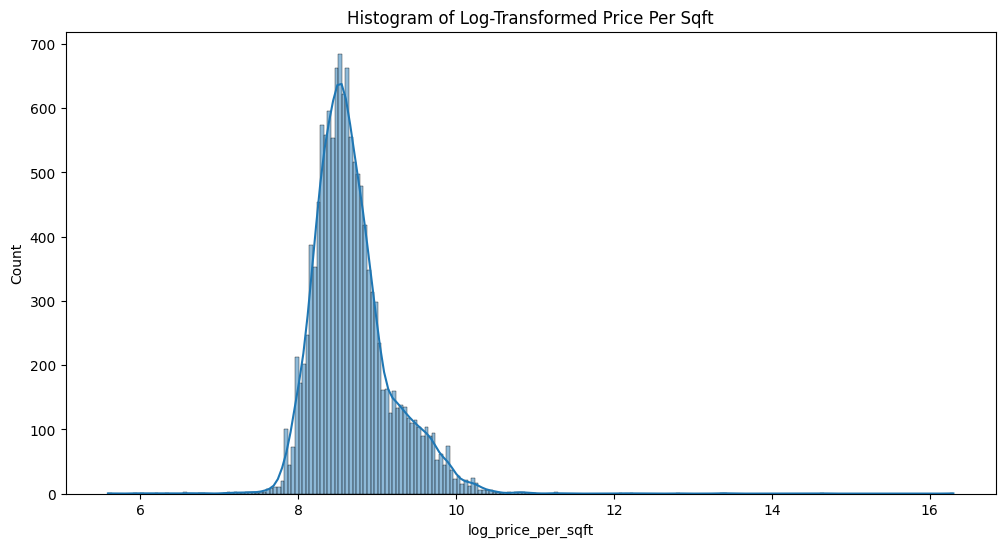

Transformed Skewness: 1.4003259019533636
Transformed Kurtosis: 9.203000543610957


In [16]:
# After Transformation
plt.figure(figsize=(12,6))
sns.histplot(df["log_price_per_sqft"], kde=True)
plt.title("Histogram of Log-Transformed Price Per Sqft")
plt.show()
print("Transformed Skewness:", skew(df["log_price_per_sqft"]))
print("Transformed Kurtosis:", kurtosis(df["log_price_per_sqft"]))

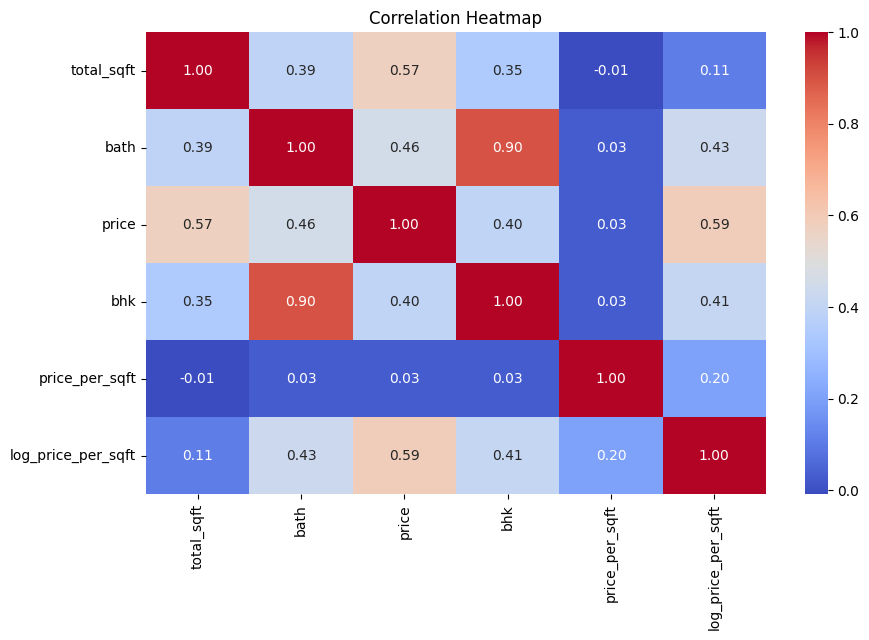

In [25]:
#Q5:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

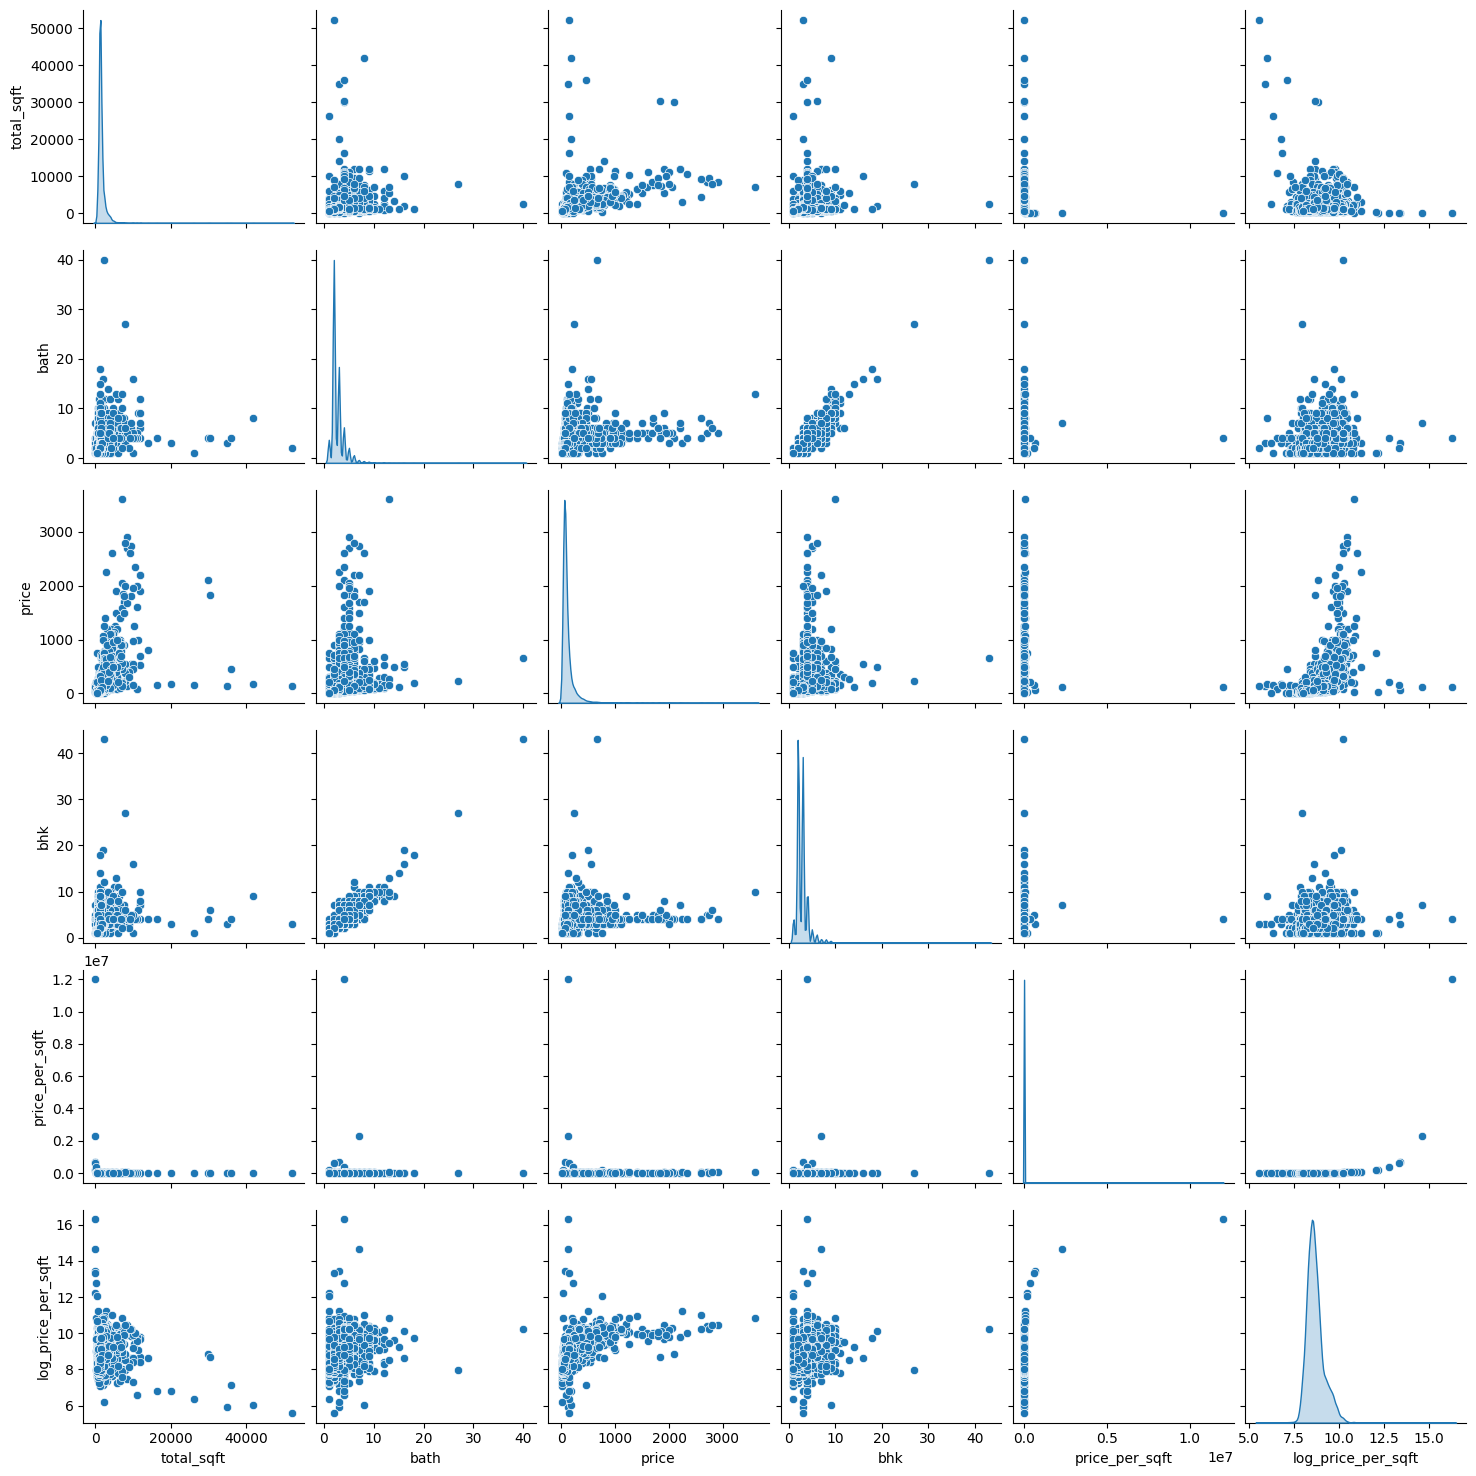

In [26]:
Q6:
sns.pairplot(df, diag_kind='kde')
plt.show()